<a href="https://colab.research.google.com/github/Brenda01234/Generative-AI/blob/main/Superstore_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading sample data**

In [5]:
df=pd.read_csv("Superstore.csv", encoding='latin1')
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

**Data inspection**

In [9]:
#df.head()
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

**Filtering and selection**

In [51]:
from matplotlib.cbook import print_cycles
from pandas.core.dtypes import dtypes
#df['City'].nunique()    # How many unique cities are in the dataset?
#df['State'].nunique()   # How many unique states are in the dataset?

#df['Category'].nunique()
#df['Sub-Category'].nunique()
#df['Segment'].nunique()
#df['Ship Mode'].unique()


#Changing datatypes into category since are form of categorical
df['City']=df['City'].astype('category')
df['State']=df['State'].astype('category')
df['Category']=df['Category']
df['Sub-Category']=df['Sub-Category'].astype('category')
df['Segment']=df['Segment'].astype('category')
df['Ship Mode']=df['Ship Mode'].astype('category')
print(df.dtypes)


#Checking for duplicates
df.duplicated().sum()

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode        category
Customer ID        object
Customer Name      object
Segment          category
Country            object
City             category
State            category
Postal Code         int64
Region             object
Product ID         object
Category         category
Sub-Category     category
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
dtype: object


np.int64(0)

In [49]:
df.duplicated().sum()

np.int64(0)

In [64]:
#Total quantity for each category in different Regions and ship mode
quantity_by_category_region_shipmode=df.groupby(['Region','Category','Ship Mode'])['Quantity'].sum()
print(quantity_by_category_region_shipmode)

#Total profit for each category
profit_margin_by_category=df.groupby('Category')['Profit'].sum()
print(profit_margin_by_category)

#Total sales and profit for each Region
sales_profit_by_region=df.groupby('Region')[['Sales','Profit']].sum()
print(sales_profit_by_region)

#Total sales and profit for each segment
sales_profit_by_segment=df.groupby('Segment')[['Sales','Profit']].sum()
print(sales_profit_by_segment)

Region   Category         Ship Mode     
Central  Furniture        First Class        263
                          Same Day           103
                          Second Class       343
                          Standard Class    1118
         Office Supplies  First Class        665
                          Same Day           235
                          Second Class      1063
                          Standard Class    3446
         Technology       First Class        228
                          Same Day            54
                          Second Class       389
                          Standard Class     873
East     Furniture        First Class        383
                          Same Day           130
                          Second Class       433
                          Standard Class    1268
         Office Supplies  First Class       1105
                          Same Day           332
                          Second Class      1249
                          St

/tmp/ipython-input-2153113861.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_by_category_region_shipmode=df.groupby(['Region','Category','Ship Mode'])['Quantity'].sum()
/tmp/ipython-input-2153113861.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_margin_by_category=df.groupby('Category')['Profit'].sum()
/tmp/ipython-input-2153113861.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_profi

***KPI for superstore analysis***

Total sales: 4200
Total profit: 850
Total Quantity: 42
Total discount: 0.7
Average discount: 0.13999999999999999
Profit margin: 0.20238095238095238


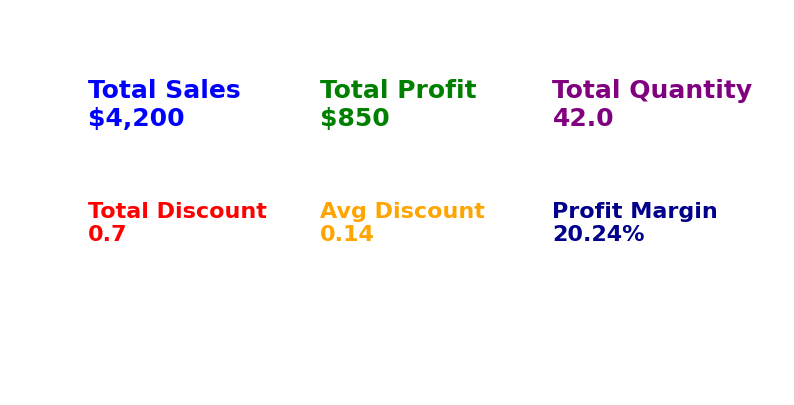

In [125]:
import matplotlib.pyplot as plt

# Calculate KPIs
Total_sales = df['Sales'].sum()
print("Total sales: " + str(Total_sales))

Total_profit = df['Profit'].sum()
print("Total profit: " + str(Total_profit))

Total_Quantity = df['Quantity'].sum()
print("Total Quantity: " + str(Total_Quantity))

Total_discount = df['Discount'].sum()
print("Total discount: " + str(Total_discount))

Average_discount = df['Discount'].mean()
print("Average discount: " + str(Average_discount))

Profit_margin = Total_profit / Total_sales
print("Profit margin: " + str(Profit_margin))

# Create figure
fig, ax = plt.subplots(figsize=(10, 5))

# Hide axes
ax.axis('off')

# Add KPI text
ax.text(0.1, 0.7, f"Total Sales\n${Total_sales:,.0f}", fontsize=18, weight='bold', color='blue')
ax.text(0.4, 0.7, f"Total Profit\n${Total_profit:,.0f}", fontsize=18, weight='bold', color='green')
ax.text(0.7, 0.7, f"Total Quantity\n{Total_Quantity:.1f}", fontsize=18, weight='bold', color='purple')

ax.text(0.1, 0.4, f"Total Discount\n{Total_discount:.1f}", fontsize=16, weight='bold', color='red')
ax.text(0.4, 0.4, f"Avg Discount\n{Average_discount:.2f}", fontsize=16, weight='bold', color='orange')
ax.text(0.7, 0.4, f"Profit Margin\n{Profit_margin:.2%}", fontsize=16, weight='bold', color='darkblue')

plt.show()


**Filtering**

**Data visualization using Matplotlib**

*   Bar charts
*   Line plot


*   Histogram
*   Pie chart






In [100]:
import plotly.graph_objects as go

# KPI cards
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode="number+delta",
    value=df['Sales'].sum(),
    title={"text": "Total Sales"},
    domain={'x': [0, 0.3], 'y': [0, 1]}
))

fig.add_trace(go.Indicator(
    mode="number+delta",
    value=df['Profit'].sum(),
    title={"text": "Total Profit"},
    domain={'x': [0.35, 0.65], 'y': [0, 1]}
))

fig.add_trace(go.Indicator(
    mode="number",
    value=df['Quantity'].mean(),
    title={"text": "Avg Quantity"},
    domain={'x': [0.7, 1], 'y': [0, 1]}
))

fig.show()


In [69]:
#Create Date Hierarchy columns for the dataset
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Month']=df['Order Date'].dt.month
df['Month Name']=df['Order Date'].dt.month_name()
df['Quarter']=df['Order Date'].dt.quarter
df['Year']=df['Order Date'].dt.year
print(df.head(5))

   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

                                        Product Name     Sales Quantity  \
0                  Bush

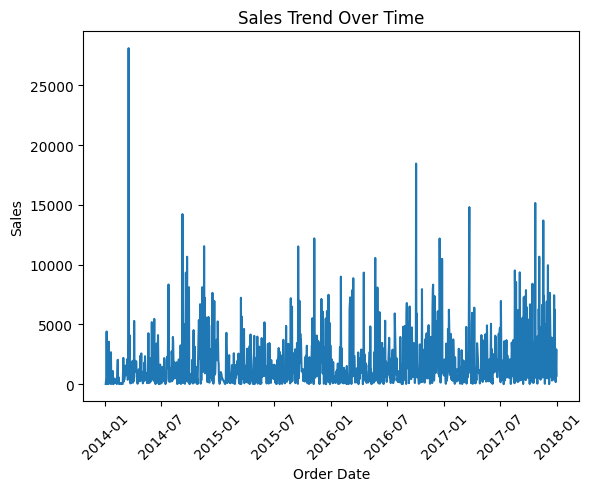

In [76]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

plt.plot(daily_sales['Order Date'], daily_sales['Sales'])
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45)
plt.show()

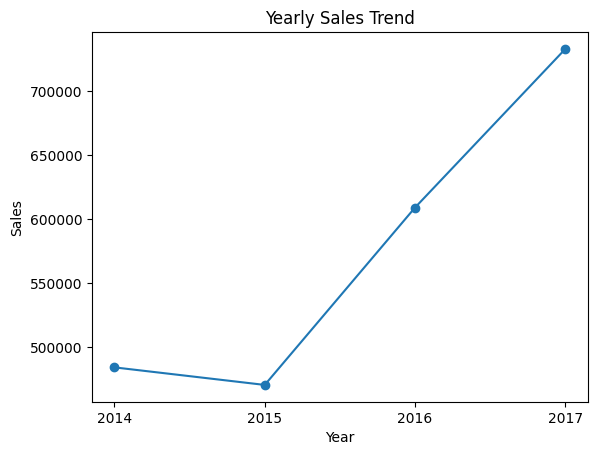

In [78]:
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

plt.plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Yearly Sales Trend')
plt.xticks(yearly_sales['Year'])  # ensures only years appear
plt.show()

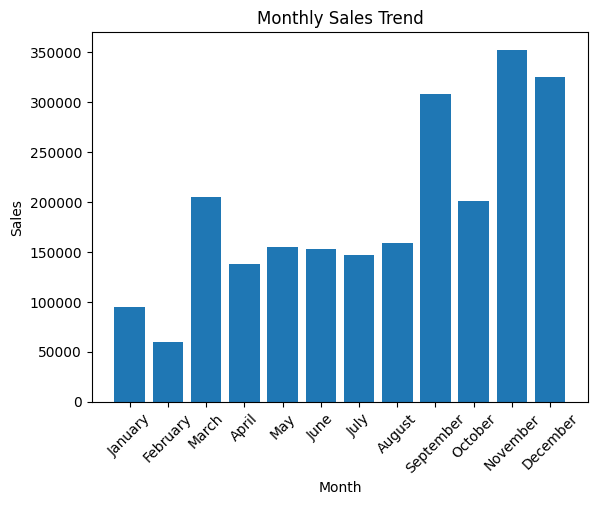

In [79]:
#Bar chart for months by sales

#Aggregate sales by Month

monthly_sales = df.groupby('Month Name')['Sales'].sum().reset_index()

#Sort Months in calender order
month_order = ['January', 'February', 'March', 'April',
               'May', 'June', 'July', 'August', 'September',
               'October', 'November', 'December']

monthly_sales['Month Name'] = pd.Categorical(monthly_sales['Month Name'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month Name')

#Plot Bar chart

plt.bar(monthly_sales['Month Name'], monthly_sales['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()



/tmp/ipython-input-1348444579.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sales_profit = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()


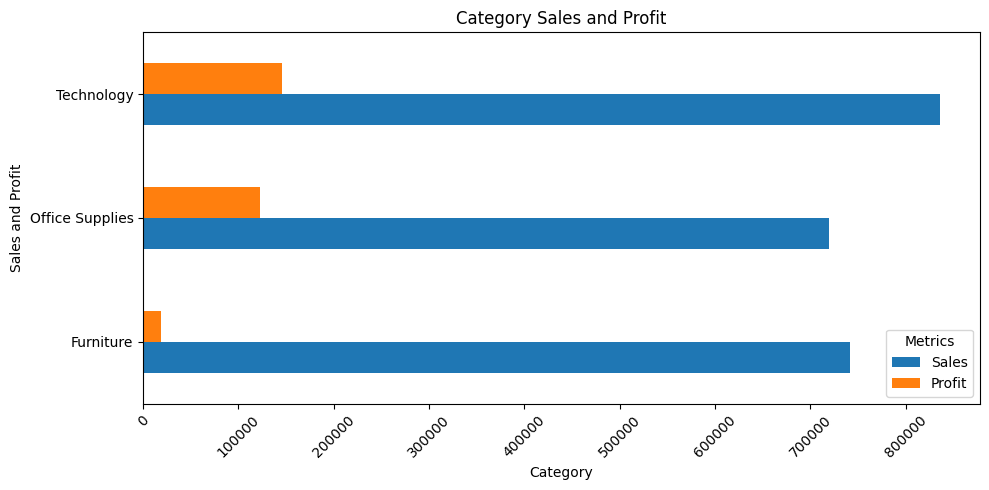

In [85]:
#stacked bar chart of Sales and Profit by Category

category_sales_profit = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
category_sales_profit

category_sales_profit.plot(kind='barh', x='Category', y=['Sales', 'Profit'], stacked=False, figsize=(10,5))
plt.xlabel('Category')
plt.ylabel('Sales and Profit')
plt.title('Category Sales and Profit')
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

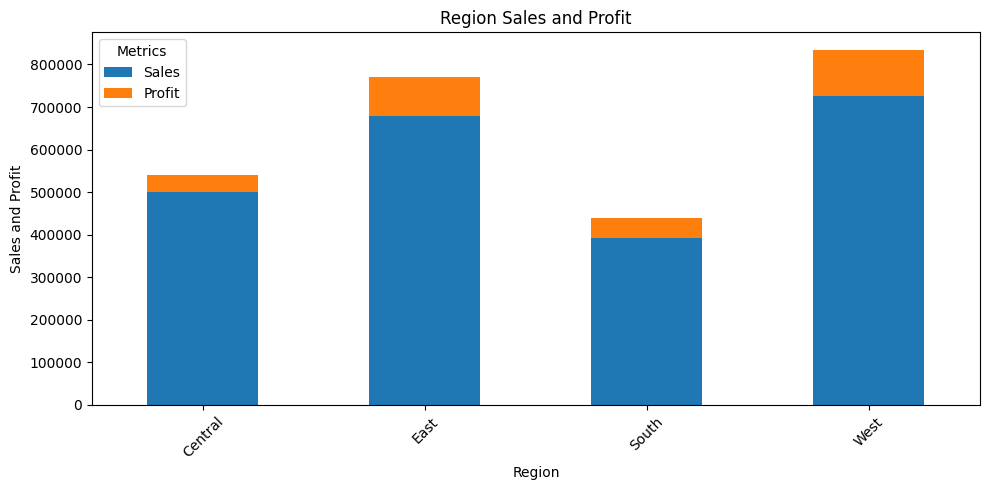

In [86]:
# Stacked bar chart for sales and profit by region

region_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

region_sales_profit.plot(kind='bar', x='Region', y=['Sales', 'Profit'], stacked=True, figsize=(10,5))
plt.xlabel('Region')
plt.ylabel('Sales and Profit')
plt.title('Region Sales and Profit')
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

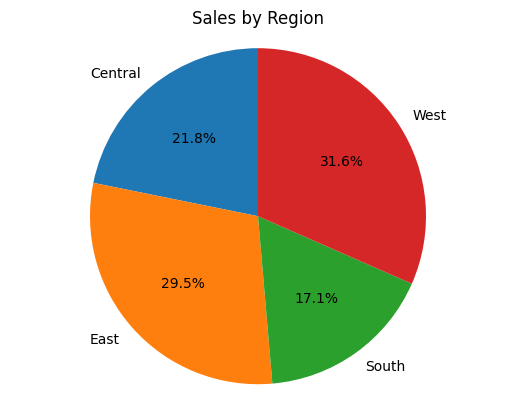

In [87]:
# Pie chart for sales by Region

region_sales = df.groupby('Region')['Sales'].sum().reset_index()

plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%',startangle=90)
plt.title('Sales by Region')
plt.axis('equal')
plt.show()


/tmp/ipython-input-3917415761.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_quantity = df.groupby('Category')['Quantity'].sum().reset_index()


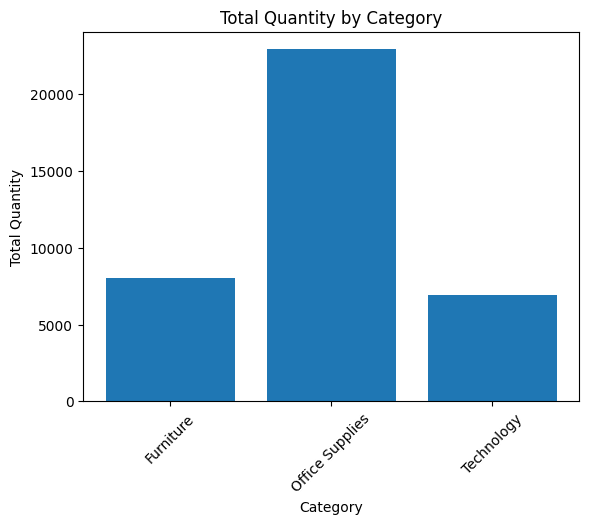

In [90]:

#Compare quantity across categories using a bar chart
category_quantity = df.groupby('Category')['Quantity'].sum().reset_index()

plt.bar(category_quantity['Category'], category_quantity['Quantity'])
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Category')
plt.xticks(rotation=45)
plt.show()


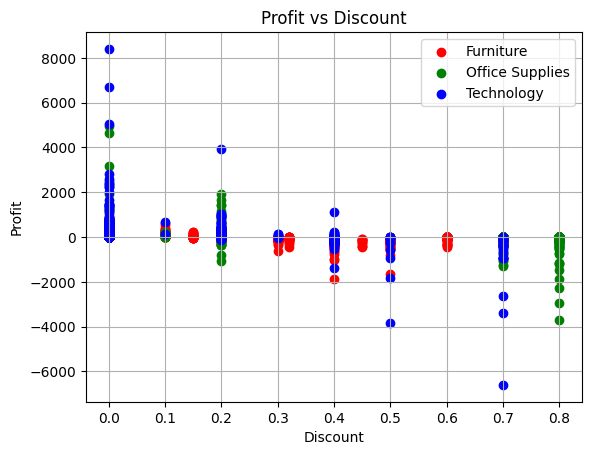

In [93]:
# Scatter plot for Profit vs discount

#color by category
categories=df['Category'].unique()
colors=['red','green','blue']

for cat,color in zip(categories,colors):
  filtered_df=df[df['Category']==cat]
  plt.scatter(filtered_df['Discount'],filtered_df['Profit'],label=cat,color=color)

plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Profit vs Discount')
plt.grid(True) #add grids
plt.legend()
plt.show()

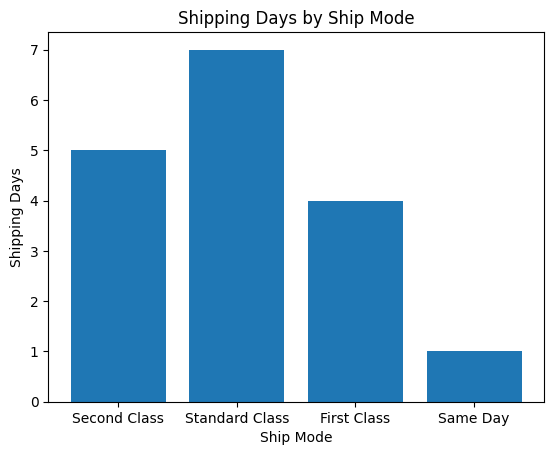

In [96]:
# Calculate shipping delays and plot a pie chart for delays days by ship mode


# Convert to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate shipping days
df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

#Bar chart
plt.bar(df['Ship Mode'], df['Shipping_Days'])
plt.xlabel('Ship Mode')
plt.ylabel('Shipping Days')
plt.title('Shipping Days by Ship Mode')
plt.show()

**Summary data**

In [98]:
df_summary = df.groupby(['Category', 'City'])[['Sales', 'Profit', 'Quantity']].sum().reset_index()

print(df_summary)

df_summary.head()


        Category         City     Sales     Profit  Quantity
0      Furniture     Aberdeen     0.000     0.0000         0
1      Furniture      Abilene     0.000     0.0000         0
2      Furniture        Akron   433.596   -72.0996         5
3      Furniture  Albuquerque     0.000     0.0000         0
4      Furniture   Alexandria   267.460   104.4522        20
...          ...          ...       ...        ...       ...
1588  Technology   Woonsocket     0.000     0.0000         0
1589  Technology      Yonkers  6140.220  2809.1598        26
1590  Technology         York     0.000     0.0000         0
1591  Technology      Yucaipa     0.000     0.0000         0
1592  Technology         Yuma   785.513  -431.2869        12

[1593 rows x 5 columns]


/tmp/ipython-input-4206762468.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_summary = df.groupby(['Category', 'City'])[['Sales', 'Profit', 'Quantity']].sum().reset_index()


,Category,City,Sales,Profit,Quantity
0,Furniture,Aberdeen,0.000,0.0000,0
1,Furniture,Abilene,0.000,0.0000,0
2,Furniture,Akron,433.596,-72.0996,5
3,Furniture,Albuquerque,0.000,0.0000,0
4,Furniture,Alexandria,267.460,104.4522,20


In [ ]:

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from dash import Dash, html, dcc

# Example dataset (replace with your actual df)
data = {
    'Category': ['Furniture', 'Technology', 'Office Supplies', 'Furniture', 'Technology'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami'],
    'Sales': [500, 1200, 300, 700, 1500],
    'Profit': [50, 300, 30, 70, 400],
    'Quantity': [5, 12, 3, 7, 15],
    'Discount': [0.1, 0.2, 0.05, 0.15, 0.2],
    'Order_Date': ['2024-01-01', '2024-02-10', '2024-03-15', '2024-04-05', '2024-05-20'],
    'Region': ['East', 'West', 'Central', 'South', 'South']
}

df = pd.DataFrame(data)
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Year'] = df['Order_Date'].dt.year

# KPI values
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_quantity = df['Quantity'].mean()

# Initialize Dash app
app = Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Sales Dashboard", style={'textAlign': 'center'}),

    # KPI Cards
    html.Div([
        html.Div([
            html.H3("Total Sales"),
            html.H4(f"${total_sales:,.0f}")
        ], style={'width': '30%', 'display': 'inline-block', 'textAlign': 'center', 'backgroundColor': '#ADD8E6', 'padding': '10px', 'margin': '5px'}),

        html.Div([
            html.H3("Total Profit"),
            html.H4(f"${total_profit:,.0f}")
        ], style={'width': '30%', 'display': 'inline-block', 'textAlign': 'center', 'backgroundColor': '#90EE90', 'padding': '10px', 'margin': '5px'}),

        html.Div([
            html.H3("Avg Quantity"),
            html.H4(f"{avg_quantity:.1f}")
        ], style={'width': '30%', 'display': 'inline-block', 'textAlign': 'center', 'backgroundColor': '#FFD700', 'padding': '10px', 'margin': '5px'}),
    ], style={'display': 'flex', 'justifyContent': 'center'}),

    # Line Chart: Sales by Year
    html.Div([
        dcc.Graph(
            figure=px.line(df.groupby('Year')['Sales'].sum().reset_index(),
                           x='Year', y='Sales',
                           title='Sales by Year', markers=True)
        )
    ]),

    # Bar Chart: Quantity by Category
    html.Div([
        dcc.Graph(
            figure=px.bar(df.groupby('Category')['Quantity'].sum().reset_index(),
                          x='Category', y='Quantity', title='Quantity by Category')
        )
    ]),

    # Pie Chart: Sales by Region
    html.Div([
        dcc.Graph(
            figure=px.pie(df.groupby('Region')['Sales'].sum().reset_index(),
                          names='Region', values='Sales', title='Sales by Region')
        )
    ]),

    # Scatter Plot: Profit vs Discount
    html.Div([
        dcc.Graph(
            figure=px.scatter(df, x='Discount', y='Profit', color='Category',
                              size='Sales', title='Profit vs Discount', hover_data=['City'])
        )
    ])
])

# Run server
if __name__ == '__main__':
    app.run(debug=True)